In [17]:
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Conversion Rate

In [19]:
df = pd.read_csv('../data/bank-additional-full.csv', sep=';')

In [20]:
df.shape

(41188, 21)

In [21]:
df.tail(21)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41167,32,admin.,married,university.degree,no,yes,no,cellular,nov,wed,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41168,38,entrepreneur,married,university.degree,no,no,no,cellular,nov,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41169,62,services,married,high.school,no,yes,no,cellular,nov,wed,...,5,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,...,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41171,33,student,married,professional.course,no,yes,no,telephone,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41172,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no
41176,38,housemaid,divorced,high.school,no,yes,yes,cellular,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no


In [22]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


### 1. Aggregate Conversion Rate

In [24]:
print('total conversions: %i out of %i' % (df.conversion.sum(), df.shape[0]))

total conversions: 4640 out of 41188


In [25]:
print('conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

conversion rate: 11.27%


### 2. Conversion Rates by Number of Contacts

In [26]:
pd.DataFrame(
    df.groupby(
        by='campaign'
    )['conversion'].sum()
)

,conversion
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


In [27]:
pd.DataFrame(
    df.groupby(
        by='campaign'
    )['conversion'].count()
)

,conversion
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


In [28]:
conversions_by_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0

# divides the two numbers for each campaign in the two code cells above this to get conversion rate (%'ge) by campaign


In [29]:
pd.DataFrame(conversions_by_contacts)    # converts series to a data frame, but does not give it a name

,conversion
campaign,
1,13.037071
2,11.456954
3,10.747051
4,9.392682
5,7.504690
6,7.660878
7,6.041335
8,4.250000
9,6.007067


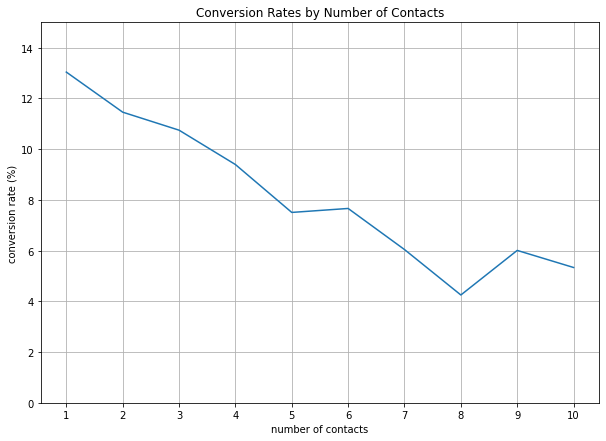

In [30]:
ax = conversions_by_contacts[:10].plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversions_by_contacts.index[:10],
    title='Conversion Rates by Number of Contacts'
)

ax.set_ylim([0, 15])   # sets range for vertical axis
ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate (%)')

plt.show()    #  only works if matplotlib library has been imported and given alias "plt"

# 3. Conversion Rates by Age

#### - Line Chart

In [31]:
# Similar code to above, calculates # conversions by age, then total # records by age, and finally conversion rate by age

pd.DataFrame(
    df.groupby(
        by='age'
    )['conversion'].sum()
)

,conversion
age,
17,2
18,12
19,20
20,23
21,29
...,...
91,0
92,3
94,0


In [32]:
pd.DataFrame(
    df.groupby(
        by='age'
    )['conversion'].count()
)

,conversion
age,
17,5
18,28
19,42
20,65
21,102
...,...
91,2
92,4
94,1


In [33]:
conversions_by_age = df.groupby(
    by='age'
)['conversion'].sum() / df.groupby(
    by='age'
)['conversion'].count() * 100.0

In [34]:
pd.DataFrame(conversions_by_age)

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


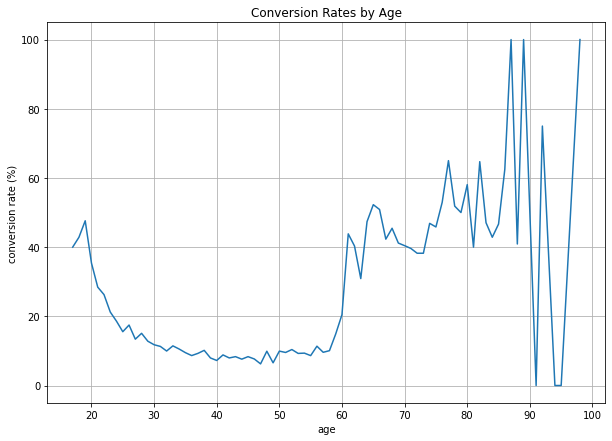

In [35]:
# plots all points (not just the first 10, as in code block for campaign # above) from chart above

ax = conversions_by_age.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

#### - Age Groups

In [36]:
df['age_group'] = df['age'].apply(
    lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

In [37]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[30, 40)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[40, 50)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"


In [38]:
# To calculate conversion rate for each newly created "age group" bin, repeat the same three steps above:

# Step 1:  Calculate # of conversions by age group (bin)

pd.DataFrame(
    df.groupby(
        by='age_group'
    )['conversion'].sum()
)

,conversion
age_group,
70+,221
"[18, 30)",922
"[30, 40)",1715
"[40, 50)",834
"[50, 60)",697
"[60, 70)",251


In [39]:
# Step 2:  Calculate total # of records by age group (bin)

pd.DataFrame(
    df.groupby(
        by='age_group'
    )['conversion'].count()
)

,conversion
age_group,
70+,469
"[18, 30)",5669
"[30, 40)",16938
"[40, 50)",10526
"[50, 60)",6862
"[60, 70)",724


In [40]:
# Step 3:  Use two code blocks above to calculate and chart a summary dataframe with conversion rate (%'ge) by age group (bin)

conversions_by_age_group = df.groupby(
    by='age_group'
)['conversion'].sum() / df.groupby(
    by='age_group'
)['conversion'].count() * 100.0

In [41]:
pd.DataFrame(conversions_by_age_group)

,conversion
age_group,
70+,47.121535
"[18, 30)",16.263891
"[30, 40)",10.125162
"[40, 50)",7.923238
"[50, 60)",10.157389
"[60, 70)",34.668508


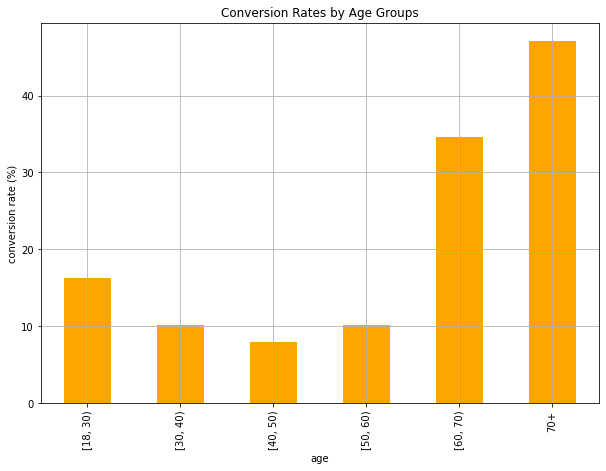

In [42]:
# Now plot the data above as a bar graph to see patterns:

ax = conversions_by_age_group.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']   # this establishes the bin order in the plot
].plot(
    kind='bar',
    color='orange',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

### 4. Conversions vs. Non-Conversions

#### 4.1. Marital Status

In [43]:
conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df

# 'values' is the categorical version of the Target, variable 'y' ('yes' or 'no'), 
# while 'columns' is the numerical version of the Target, variable "conversion" (1 or 0),
# and 'index' is essentially the 'group by' categorical variable

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [44]:
# this just renames the headers in the summary dataframe created above

conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']  # How to add column names to a Pandas dataframe

In [45]:
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


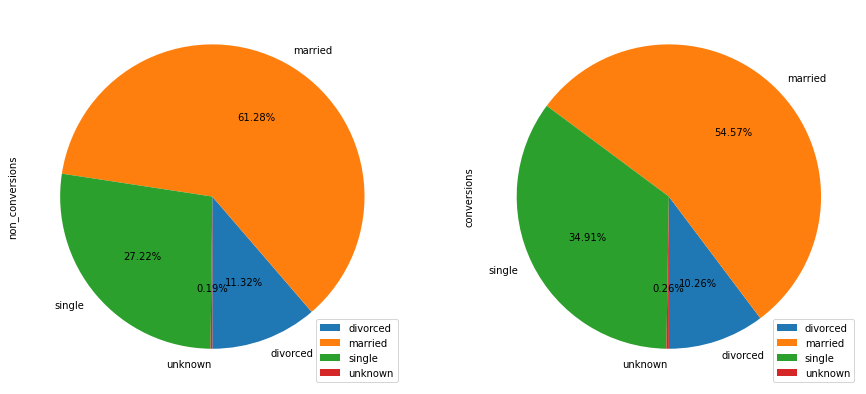

In [47]:
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),  #  Width and height in inches.  You can see the changes for width more readily. 
    startangle=90,    # experiment with different values here
    subplots=True,    # shows two pie charts on same graph
    autopct=lambda x: '%0.2f%%' % x   # shows plot labels as percentages with one decimal place
)

plt.show()

#### 4.2. Education

In [48]:
conversions_by_education_df = pd.pivot_table(df, values='y', index='education', columns='conversion', aggfunc=len)
conversions_by_education_df

conversion,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [49]:
conversions_by_education_df.columns = ['non_conversions', 'conversions']

In [50]:
conversions_by_education_df

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


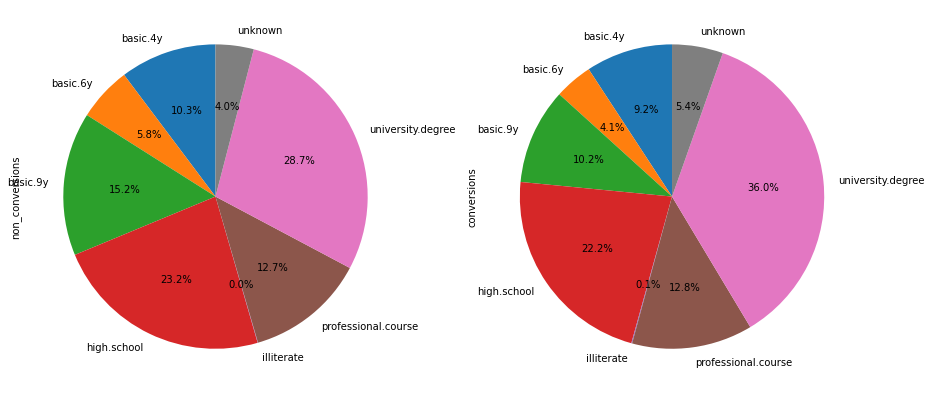

In [51]:
conversions_by_education_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False  # When your variable being plotted has more than a few values, like here, this makes the chart less cluttered
)

plt.show()

#### 4.3. Last Contact Duration

In [53]:
df.groupby('conversion')['duration'].describe()

#   This is a handy piece of code for EDA!  Duration is continuous var,
#   measured in seconds, and Conversion is target (1/0) in this case

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [54]:
# This creates a new dataframe which concatenates the two columns above (without the index columns -- just the durations)

duration_df = pd.concat([
    df.loc[df['conversion'] == 1, 'duration'].reset_index(drop=True), 
    df.loc[df['conversion'] == 0, 'duration'].reset_index(drop=True)
], axis=1)   # this concatenates the two dataframes column-wise (axis = 0 would be row-wise)

duration_df.columns = ['conversions', 'non_conversions']    # labels the columns of this new data frame

#  Note how this is just a list of all the duration values resulting in a conversion in the first column, and all the duration
#  duration values associated with a non-conversion in the second column, so a) the first (index) column is just a counter, 
#  means nothing, b) for each row of output, e.g. Index 0, the values in the first and second column DO NOT come from the same
#  record -- in fact they can't because each record is either a conversion or it's not.    d)  Since there are fewer conversions
#  than non-conversions in this dataset, you will see more values in the "non-conversions" column below, with NaN's to fill in
#  the rest of the conversions column and make it a clean dataframe. 

duration_df = duration_df / (60*60)  # converts all numbers in this new dataframe from seconds to hours


In [55]:
duration_df

,conversions,non_conversions
0,0.437500,0.072500
1,0.289444,0.041389
2,0.407500,0.062778
3,0.160833,0.041944
4,0.128056,0.085278
...,...,...
36543,NaN,0.070556
36544,NaN,0.031111
36545,NaN,0.106389
36546,NaN,0.052500


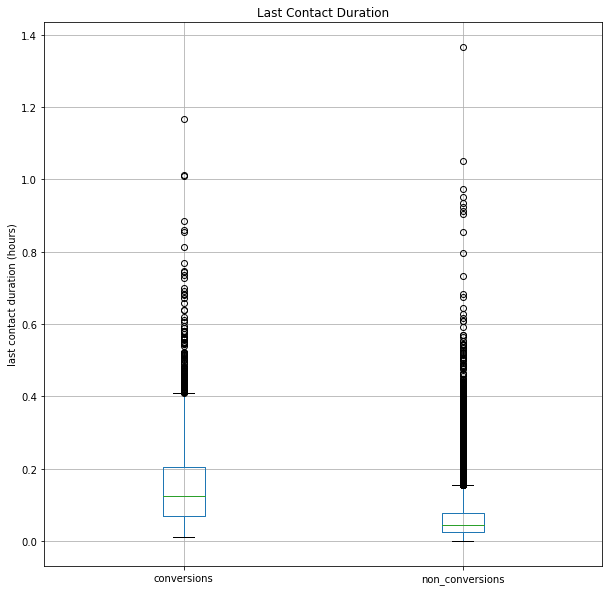

In [56]:
#  Great!  Now let's plot the data above to compare the distribution of this continuous variable (duration) 
#  for Target = 1 vs. 0 (conversions vs. non-conversions)

ax = duration_df.plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('last contact duration (hours)')
ax.set_title('Last Contact Duration')

plt.show()

### 5. Conversions by Age Groups & Marital Status

In [57]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)

In [58]:
age_marital_df = age_marital_df.divide(
    df.groupby(
        by='age_group'
    )['conversion'].count(), 
    axis=0
)

In [59]:
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40, 50)",0.011970,0.054627,0.012350,0.000285
"[50, 60)",0.017342,0.077674,0.006412,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381


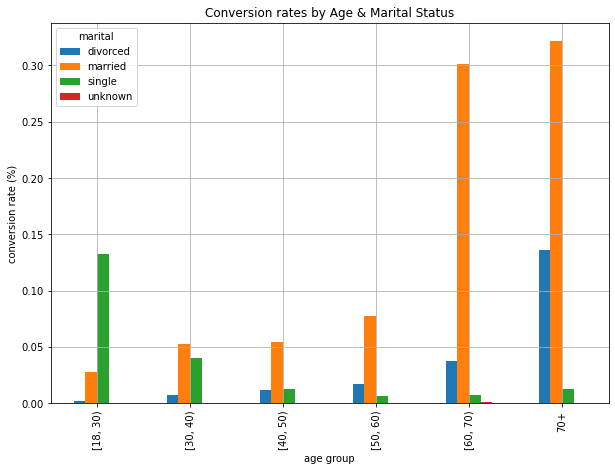

In [60]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

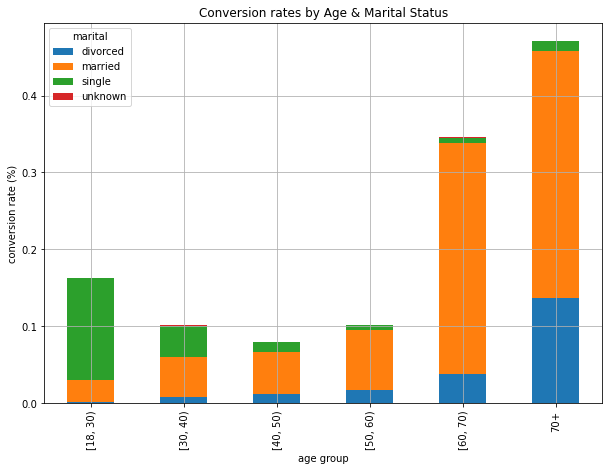

In [43]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    stacked=True,   # this is the only difference in this code block vs. the one above
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()